## Семинар 1. Основные понятия и примеры прикладных задач

**Библиотеки**

In [120]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import numpy as np
import pandas as pd

### 1. Ирисы Фишера

In [6]:
columns = ['Длина чашелистника', 'Ширина чашелистника',
         'Длина лепестка',  'Ширина лепестка', 'Класс']

In [17]:
dataset = pd.read_csv('data/iris.csv')
dataset.columns = columns

In [18]:
dataset.head(3)

,Длина чашелистника,Ширина чашелистника,Длина лепестка,Ширина лепестка,Класс
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


**1.1. Начало работы с данными:**  
1. Определить множество объектов:  
    * Определить размер выборки;  
    * Определить признаки, которыми описываются объекты.  
2. Определить множество ответов  
3. Определить тип задачи машинного обучения  
4. ...

**Множество объектов**  
В данной задаче множество объектов описывается $n=4$ признаками:
1. Длина чашелистника;  
2. Ширина чашелистника;  
3. Длина лепестка;
4. Ширина лепестка.

In [19]:
print('Размер выборки: ' + str(len(dataset)) + ' элементов.')

Размер выборки: 150 элементов.


Все признаки являются вещественными признаками. Формально объекты $X$ представляются в виде:  
<center> $X \in \mathbb{R}^{l\times n}$</center>  
$l$ - число объектов;  
$n$ - число признаков.  
  
Получаем, что $X$ это некоторая вещественная матрица размера $l\times n$.

**Множество ответов**  
В данной задаче множество ответов сотсоит из трех элементов:  
1. Iris-virginica;
2. Iris-versicolor;
3. Iris-setosa.

**Задача машинного обучения**  
В нашем случае, так как можщность множества $|y|=3 << l=150$, то получаем задачу классификации на $M=3$ класса.

**Анализ данных**  
Сначала проэцируем все объекты на двумерные плоскости, для упрощения анализа.

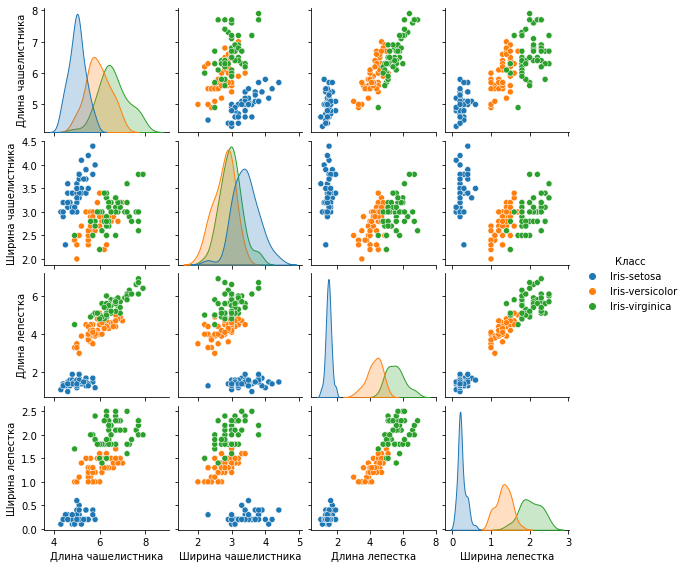

In [21]:
sns.pairplot(dataset, hue='Класс', height=2)
plt.show()

Класс Iris-setosa легко отделяется от двух остальных классов. Остальные два класса, по крайней мере на плоскости, отделяются друг от друга тяжелее ввиду их наложения друг на друга, но тем не менее можно провести прямую, которая отделит оранжевые точки от зеленых.

**1.2. Построение модели**

**Преобразование данных**  
Нам требуется решить задачу классификации на $3$ класса. Но для наглядности рассмотрим бинарную классификацию. Для этого уберем из выборки все объкты класса Iris-setosa.

In [22]:
binary_dataset = dataset.drop(index=dataset.index[dataset['Класс'] == 'Iris-setosa'])

Классы (категориальные признаки) закодируем целыми числами ${-1, 1}$.

In [24]:
binary_dataset.loc[dataset['Класс'] == 'Iris-versicolor', dataset.columns == 'Класс'] = -1
binary_dataset.loc[dataset['Класс'] == 'Iris-virginica', dataset.columns == 'Класс'] = 1

In [25]:
binary_dataset.head(3)

,Длина чашелистника,Ширина чашелистника,Длина лепестка,Ширина лепестка,Класс
50,7.0,3.2,4.7,1.4,-1
51,6.4,3.2,4.5,1.5,-1
52,6.9,3.1,4.9,1.5,-1


В результате получаем задачу бинарной классификации.

**Модель алгоритмов**  
Модель алгоритмов $\mathfrak{F}$ в машинном обучении это некоторое множества функций, которые действуют из множества объектов в множество ответов, в нашем случае:  
<center>$\mathfrak{F}=\{f|f:\mathbb{R}^n \to \{-1, 1\}, ...\}$</center>  

Обычно $\mathfrak{F}$ это некоторое параметрическое семейство функций, то есть разные функции $f$ отличаются друг от друга только каким-то параметром. Простым примером параметрического семейства функций для задачи бинарной классификации является семейство линейных бинарных классификаторов:
<center>$\mathfrak{F}_{blc}=\{f(\theta, x) = sign(\theta^Tx) | \theta \in \mathbb{R}^n\}$</center>

**Функция потерь**  
Машинное обучение - выбор функции из множества $\mathfrak{F}$ по определенному критерию, позволяющему упорядочить функции от лучшей к худшей.  

Построим функционал качества $Q$, который каждой функции $f\in\mathfrak{F}$ ставит в соответсвии число из $\mathbb{R}_+$. В машинном обучении функционал качества обычно вводится как некоторая ошибка на выборке. Функционал качества в общем виде:  
<center>$Q(f,X,y)=\sum_{i=1}^{l}{L(f,x_i,y_i)},$</center>  
  
  где $L$ - некоторая функция ошибки на некотором объекте $x$. Функционал качетсва $Q$ называется эмпирическим риском.

**Оптимизационная задача**  
Естественно следует задача оптимизации для выбора $f\in\mathfrak{F}$:  
<center>$\hat{f} = \arg \min_{f\in\mathfrak{F}}{L(f,X,y)}$</center>  

В результате функция $\hat{f}$ зависит от выборки (X, y). То есть для разных наборов обучающих данных, оптимальня функция будет различной.

В нашем случае функционал качества будет иметь вид:  
<center>$Q(\theta,X,y)=\sum_{i=1}^{l}{[f(\theta, x_i)\neq y_i]}$</center>  

и оптимизационная задача записывается в виде:  
<center>$\hat{\theta}=\arg\min_{\theta\in\mathbb{R}^n}\sum_{i=1}^{l}{[f(\theta, x_i)\neq y_i]}$</center>

**Поиск оптимального вектора параметров**  
Перейдем к двум матрицам:  
1. Матрице объектов $X\in\mathbb{R}^{l\times(n+1)}$;
2. К вектору ответов $y\in\{-1, 1\}$.  

Объекты погружены в пространство большей размерности через добавление еще оного признака, который у всех объектов равен $1$.

In [32]:
X = binary_dataset.iloc[:, binary_dataset.columns != 'Класс'].values
y = binary_dataset.iloc[:, binary_dataset.columns == 'Класс'].values.reshape(-1)

In [34]:
X = np.array(np.hstack([X, np.ones([len(X), 1])]), dtype=np.float64)
y = np.array(y, dtype=np.int64)

[hstack()](https://pyprog.pro/array_manipulation/hstack.html) - соединение массивов по горизонтали.  
При классификации для sklearn важно определять значения $y$ как целочисленные.

**Обучение**

In [41]:
model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, y)

`max_iter` - критерий останова по числу итераций

Вектор $\hat{\theta}$ оптимальных параметров:

In [42]:
model.coef_

array([[-3.94426322e-01, -5.13378130e-01,  2.93108661e+00,
         2.41670685e+00, -5.18829566e-04]])

**1.3. Переход от бинарной классификации к многоклассовой**

В качестве бинарного классификатора рассмотрим ту же модель алгоритмов:  
<center>$\mathfrak{F}_{blc}=\{f(\theta, x) = sign(\theta^Tx) | \theta \in \mathbb{R}^n\}$</center>  

Но $sign$ позволяет отделить только два знака. Какие есть решения?  
Один из способов перехода - метод One VS All (Один против всех).

Для простоты визуализации рассмотрим пример на синтетических данных.

**Генерация синтетической выборки**

In [72]:
np.random.seed(0)
l = 100
n = 2

In [73]:
X1 = np.array([[-1, -1]]) + 0.5*np.random.randn(l, n)
X2 = np.array([[1, 1]]) + 0.5*np.random.randn(l, n)
X3 = np.array([[-1, 1]]) + 0.5*np.random.randn(l, n)

In [74]:
X = np.vstack([X1, X2, X3])
y = np.hstack([[0]*l, [1]*l, [2]*l])

[vstack()](https://pyprog.pro/array_manipulation/vstack.html) - соединение массивов по вертикали.

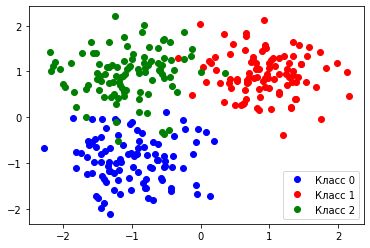

In [75]:
cols = ['blue', 'red', 'green']

for k in np.unique(y):
    plt.plot(X[y==k, 0], X[y==k, 1],
             'o', label='Класс {}'.format(k), color=cols[k])
    
plt.legend(loc='best')
plt.show()

**Реализация метода**

Данный метод основан на том, что для классификации на $M>2$ классов нужно построить $M$ линейных классификаторов, которые классифицируют $k$-й класс против всех остальных классов.

In [76]:
models = []

model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y==0, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y==1, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000)
_ = model.fit(X, np.array(y==2, dtype=np.int64))
models.append(model)

**Визуализация результатов**

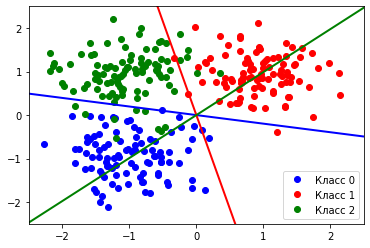

In [77]:
cols = ['blue', 'red', 'green']
plt.xlim((-2.5, 2.5))
plt.ylim((-2.5, 2.5))

# Построение точек
for k in np.unique(y):
    plt.plot(X[y==k, 0], X[y==k, 1],
             'o', label='Класс {}'.format(k), color=cols[k])
    
# Построение прямой, перпендикулярной к разделящей
for k in np.unique(y):
    # Нормальный вектор к прямой
    x2, y2 = -models[k].coef_[0][1]/models[k].coef_[0][0], 1
    
    polynomial = np.poly1d(np.polyfit([0, x2], [0, y2], 1))
    x_axis = np.linspace(-10, 10)
    y_axis = polynomial(x_axis)
    plt.plot(x_axis, y_axis, linewidth=2, color=cols[k])
    
plt.legend(loc='best')
plt.show()

Также из картинки видно, что классы могут пересекаться. Чтобы применить самый простой способ исправления пересечений, заметим, что линии разделили всю плоскость на $6$ частей. Для каждого объекта (для каждой точки на плоскости) определена кодировка вида - $[0, 1, 1]$ - синий-$0$; красный-$1$; зеленый-$1$. Таким образом можно самостоятельно задать, какие кодировки какому из трех цветов соответсвуют.

Также из картинки видно, что по второму классу (зеленые точки) есть ошибки. Некоторые точки из синего кластера определяются как зеленые. Было бы лучше поднять зеленую линию выше. В данном случае этого не происходит так как набор признаков не позволяет изменять высоту разделяющей гиперплоскости, только ее угол наклона - поэтому все разделяющие гиперплоскости (в данном случае линии) проходят через центр координат. Добавление признака $1$ ко всем объектам позволяет обойти данное ограничение.

**Формирование нового признака и обучение моделей**

In [113]:
X_v = np.hstack((X, np.ones((len(X), 1))))

In [117]:
models_v = []

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X_v, np.array(y==0, dtype=np.int64))
models_v.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X_v, np.array(y==1, dtype=np.int64))
models_v.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X_v, np.array(y==2, dtype=np.int64))
models_v.append(model)

**Визуализация**

In [121]:
def get_line(a, b, c=0, x_min=-10, x_max=10):
    x1, y1 = -(-models[k].coef_[0][1] + c)/models[k].coef_[0][0], -1
    x2, y2 = -(models[k].coef_[0][1] + c)/models[k].coef_[0][0], 1
    
    polynomial = np.poly1d(np.polyfit([x1, x2], [y1, y2], 1))
    x_axis = np.linspace(x_min, x_max)
    y_axis = polynomial(x_axis)
    
    return x_axis, y_axis

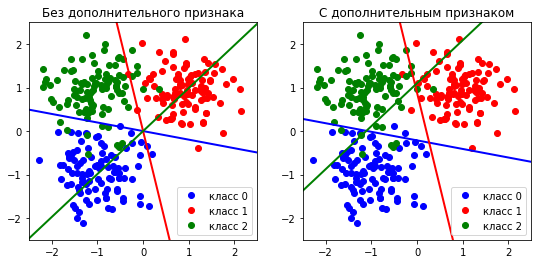

In [124]:
cols = ['blue', 'red', 'green']
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax_title = ['Без дополнительного признака', 'С дополнительным признаком']
ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].set_xlim((-2.5, 2.5)), ax[i].set_ylim((-2.5, 2.5))
    ax[i].set_title(ax_title[i])

for k in np.unique(y):
    ax[0].plot(X[y==k,0], X[y==k,1], 'o', 
               label='класс {}'.format(k), color=cols[k])
    ax[1].plot(X[y==k,0], X[y==k,1], 'o', 
               label='класс {}'.format(k), color=cols[k])

for k in np.unique(y):
    ax[0].plot(*get_line(*models[k].coef_[0][:2]), linewidth=2, color=cols[k])
    ax[1].plot(*get_line(*models_v[k].coef_[0]), linewidth=2, color=cols[k])

ax[0].legend(loc='best'), ax[1].legend(loc='best')
plt.show()

**1.4. Методы анализа качества**

Самый простой способ анализа качества - подсчет ошибок неверных классов:  
<center>$Q(\theta,X,y)=\sum_{i=1}^{l}{[f(\theta,x_i)\neq y]}$</center>  

Также можно рассмотреть таблицу попарных ошибок:  

||y=1|y=2|y=3
--|--|--|--
f(x)=1|1-1|1-2|1-3
f(x)=2|2-1|2-2|2-3
f(x)=3|3-1|3-2|3-3

Данная таблица показывает, сколько классификатор сделал ошибок между двумя парами классов. Например:
1. 2-3 - число, которое обозначает, сколько обектов класса 3 классификатор отнес к классу 2
2. 3-1 - число, которое обозначает, сколько объектов класса 1 классификатор отнес к классу 3  

Данная матрица для нашей выборки:

In [93]:
scores = np.zeros([3, 3])
for k in range(3):
    pred = np.argmax(np.vstack([models[i].predict_proba(X[y==k])[:, 1] for i in range(3)]).T, axis=1)
    for i in range(3):
        scores[i, k] = sum(pred==i)

In [94]:
scores

array([[98.,  0.,  6.],
       [ 0., 98.,  2.],
       [ 2.,  2., 92.]])

**1.5. Пример переобучения на синтетических данных**

In [96]:
np.random.seed(0)
l=6
n=1
w = np.random.randn(n)

X_tr = np.random.randn(l, n)
y_tr = X_tr@w + np.random.randn(l)

X_vl = np.random.randn(l, n)
y_vl = X_vl@w + np.random.randn(l)

X_ts = np.random.randn(l, n)
y_ts = X_ts@w + np.random.randn(l)

In [99]:
x_begin = -1.05
x_end = 2.5

X_polinom = np.hstack([X_tr**0, X_tr**1, X_tr**2, X_tr**3, X_tr**4, X_tr**5])
w_polinom = np.linalg.inv(X_polinom.T@X_polinom)@X_polinom.T@y_tr
y_polinom = list(map(lambda x: np.array([x**0, x**1, x**2, x**3, x**4, x**5])@w_polinom, np.linspace(x_begin, x_end)))

Имеется 6 точек, 1 признак и полином пятой степени.

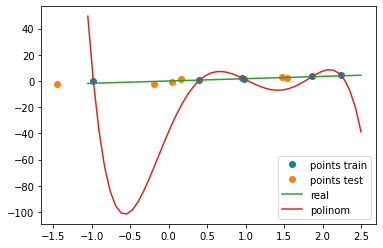

In [100]:
plt.plot(X_tr, y_tr, 'o', label='points train')
plt.plot(X_ts, y_ts, 'o', label='points test')
plt.plot(np.linspace(x_begin, x_end), w*np.linspace(x_begin, x_end), '-', label='real')
plt.plot(np.linspace(x_begin, x_end), y_polinom, '-', label='polinom')

plt.legend(loc='best')
plt.show()

Способов борьбы с переобучением множество:  
1. Изменение структуры модели;
2. Добавление регуляризаторов;
3. ...  
Но большинство методов с регуляризацией используют свои параметры (гиперпараметры), которые также нужно оптимизировать. Обычно для их оптимизации используется метод Cross-Validation и Leave One Out.

**LOO**

Метод Leave One Out (LOO) - один из простых методов борьбы с переобучением. Пусть $\hat{\theta}(X)$ - оптимальный вектор для выборки $X$. Тогда ошибка LOO пределяется:  
<center>$LOO(\mu,X_{tr},y_{tr},X_{vl},y_{vl})=\sum_{i=1}^{l_{tr}+l_{vl}}{q(\hat{\theta}(X_{tr}\cup X_{vl} \ x_i,\mu),x_i,y_i)},$</center>  

где $x_i$ - элемент из объедененного датасета обучения и валидации.  

После чего оптимальный вектор параметров является решением следующей оптимизационной задачи:  
<center>$\hat{\mu}=\arg\min_{\mu\in\mathfrak{R}}{LOO(\mu,X_{tr},y_{tr},X_{vl},y_{vl})},$</center>  
.  
<center>$\hat{\theta}=\hat{\theta}(X_{tr}\cup X_{vl},\hat{\mu})$</center>  

Для нашего синтетического примера в качестве параметра $\mu$ можно рассмотреть степень полинома для аппроксимации (изменения структуры модели).